## 영화 리뷰 분석
---
- IMDB 데이터 활용

In [1]:
from tensorflow.keras.datasets.imdb import load_data
from tensorflow.keras.utils import pad_sequences, to_categorical
import numpy as np

### [1] 데이터 준비

In [2]:
# 단어사전(voca)에서 빈도가 높은 500개까지만 사용
(x_train, y_train), (x_test, y_test)=load_data(num_words=300)

In [3]:
print(f'imDB 정보 \nx_train : {x_train.shape}   y_train : {y_train.shape}')
print(f'imDB 정보 \nx_test : {x_test.shape}   y_train : {y_test.shape}')

imDB 정보 
x_train : (25000,)   y_train : (25000,)
imDB 정보 
x_test : (25000,)   y_train : (25000,)


In [4]:
for idx in range(3):
    print(f'[{idx} - {y_train[idx]}]\n{x_train[idx]}')
    print('-'*75)

[0 - 1]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
---------------------------------------------------------------------------
[1 - 0]
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 2, 20, 13, 119, 2

### [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)

In [5]:
# [2-1] 데이터별 길이 결정
length=[]

for i in range(x_train.shape[0]):
    length.append(len(x_train[i]))

In [6]:
print(np.mean(length))
print(np.median(length))

238.71364
178.0


In [7]:
# [2-2] 데이터별 길이 변경
pad_sequences(x_train, maxlen=238)

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]])

In [8]:
train_seq=pad_sequences(x_train, maxlen=100)
train_seq.shape

(25000, 100)

In [9]:
test_seq=pad_sequences(x_test, maxlen=100)
test_seq.shape

(25000, 100)

In [10]:
to_categorical(x_train[0])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### [2-1] 타겟 데이터 인코딩

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_oh=to_categorical(train_seq)
test_oh=to_categorical(test_seq)

In [13]:
train_oh.shape, train_oh[0], test_oh.shape, test_oh[0]

((25000, 100, 300),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (25000, 100, 300),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32))

### [2-2] 훈련/테스트 데이터 준비

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_val, train_y, y_val=train_test_split(
train_oh, y_train, test_size=0.2, random_state=42)

In [16]:
print(f'x_train : {x_train.shape} | test_seq : {test_seq.shape} | x_val : {x_val.shape}')
print(f'y_train : {y_train.shape} | y_test : {y_test.shape} | y_val : {y_val.shape}')

x_train : (20000, 100, 300) | test_seq : (25000, 100) | x_val : (5000, 100, 300)
y_train : (25000,) | y_test : (25000,) | y_val : (5000,)


### [3] 모델
---
- 목표 : 영화 리뷰 데이터 학습 후 사용자가 입력하는 리뷰의 긍정/부정 분류
- 학습 모델 : RNN 순환신경망
- 입력 : 300
- 출력 : 1 (긍정/부정) => 분류 => 이진분류

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### [3-1] 모델 구성
---
- 입력층 : 노드 n개 타임스텝 수, 피쳐 수 => SimpleRNN
- 출력층 : 노드 1개 sigmoid => Dense

In [18]:
model=Sequential()

In [19]:
model.add(SimpleRNN(10, input_shape=(100, 300), 
                    return_sequences=True))  # 1개 노드 = w300+b+w10 * 10
# return_sequences=True로 해줘야 다음 층에서 SimpleRNN 또 쓸 수 있음

In [20]:
model.add(SimpleRNN(10))

In [21]:
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 10)           3110      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 3,331
Trainable params: 3,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.

### [3-2] 모델생성
---
- 손실함수, 최적화 방법, 평가 항목 => compile()

In [131]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics='accuracy')

### [4] 학습
---
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 => validation_data, validation_split
- 학습 중 이벤트 처리 => callbacks=[]
- 학습 진행 내용 조절 => verbose
- 학습 횟수 조절 => epochs
- 배치사이즈 조절 => batch_size (기본값 : 32)

In [133]:
his=model.fit(x_train, train_y, epochs=5,
         validation_data=(x_val, y_val))

Epoch 1/5
625/625 [==============================] - 14s 20ms/step - loss: 0.6132 - accuracy: 0.6633 - val_loss: 0.5312 - val_accuracy: 0.7390
Epoch 2/5
625/625 [==============================] - 13s 20ms/step - loss: 0.5362 - accuracy: 0.7382 - val_loss: 0.5147 - val_accuracy: 0.7500
Epoch 3/5
625/625 [==============================] - 13s 20ms/step - loss: 0.5161 - accuracy: 0.7515 - val_loss: 0.5223 - val_accuracy: 0.7484
Epoch 4/5
625/625 [==============================] - 13s 20ms/step - loss: 0.5095 - accuracy: 0.7580 - val_loss: 0.5235 - val_accuracy: 0.7444
Epoch 5/5
625/625 [==============================] - 13s 20ms/step - loss: 0.4989 - accuracy: 0.7628 - val_loss: 0.5377 - val_accuracy: 0.7448


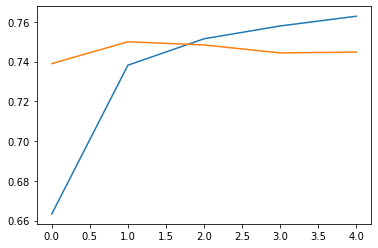

In [134]:
import matplotlib.pyplot as plt

plt.plot(his.epoch, his.history['accuracy'], label='train_accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.show()

## Embedding RNN Model
---
- One-Hot-Encoding 입력 데이터의 많은 메모리 소모에 대한 문제 해결
- 토큰을 밀집 형태의 벡터로 변경 => Word Embedding
- Embedding Layer 적용
    * 입력 차원 - 토큰의 크기 즉 단어사전의 크기
    * 출력 차원 - 줄여서 생성하는 벡터 크기
    * 입력층일 경우 -> input_dim = 타입스텝 즉 하나의 문장을 구성하는 토큰의 개수

In [135]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import plot_model

In [136]:
model2=Sequential()
# Embedding : One-Hot-Encoding의 거대한 데이터 => 밀집 형태 벡터로 변환
model2.add(Embedding(300, 20, input_length=100))
model2.add(SimpleRNN(10))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 20)           6000      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,321
Trainable params: 6,321
Non-trainable params: 0
_________________________________________________________________


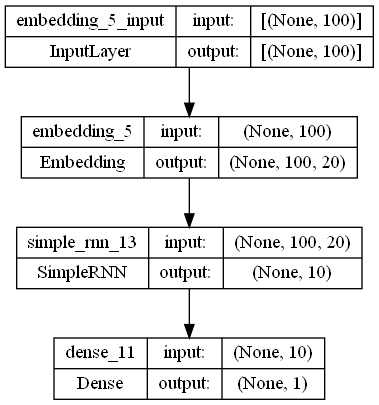

In [137]:
plot_model(model2, show_shapes=True)

In [138]:
model2.compile(loss='binary_crossentropy', optimizer='adam',
              metrics='accuracy')

In [140]:
model2.fit(train_seq, train_y, epochs=5,
          validation_data=(x_val, y_val))

ValueError: Data cardinality is ambiguous:
  x sizes: 25000
  y sizes: 20000
Make sure all arrays contain the same number of samples.

### [5] 평가

In [ ]:
model.evaluate(test_oh, y_test)